## Importação e Pré-Processamento

In [536]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


plot = 0



### Importação

In [537]:
# Read the CSV file
df_train = pd.read_csv('dados_trabalho1/conjunto_de_treinamento.csv')
# Read the test CSV file
df_test = pd.read_csv('dados_trabalho1/conjunto_de_teste.csv')


In [538]:
if (plot):
    df_train.describe()

In [539]:
# Verificar se há linhas duplicadas
duplicated_rows = df_train.duplicated()

# Eliminar duplicatas
df_train = df_train.drop_duplicates()

# Exibir as linhas duplicadas
print(df_train[duplicated_rows])

Empty DataFrame
Columns: [id_solicitante, produto_solicitado, dia_vencimento, forma_envio_solicitacao, tipo_endereco, sexo, idade, estado_civil, qtde_dependentes, grau_instrucao, nacionalidade, estado_onde_nasceu, estado_onde_reside, possui_telefone_residencial, codigo_area_telefone_residencial, tipo_residencia, meses_na_residencia, possui_telefone_celular, possui_email, renda_mensal_regular, renda_extra, possui_cartao_visa, possui_cartao_mastercard, possui_cartao_diners, possui_cartao_amex, possui_outros_cartoes, qtde_contas_bancarias, qtde_contas_bancarias_especiais, valor_patrimonio_pessoal, possui_carro, vinculo_formal_com_empresa, estado_onde_trabalha, possui_telefone_trabalho, codigo_area_telefone_trabalho, meses_no_trabalho, profissao, ocupacao, profissao_companheiro, grau_instrucao_companheiro, local_onde_reside, local_onde_trabalha, inadimplente]
Index: []

[0 rows x 42 columns]


### Verificação manual de atributos

<!-- É interessante verificar manualmente quais colunas não podem influenciar a variável inadimplência, pois não faz sentido ... Isso evita que o modelo perca processamento com colunas que não influenciam a variável alvo. -->


In [540]:
df_train.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [541]:
excluded_columns = ['id_solicitante' ]
testIDs = df_test['id_solicitante' ]

df_train = df_train.drop(excluded_columns, axis=1)
df_test = df_test.drop(excluded_columns, axis=1)

### Codificação de atributos não numéricos


In [542]:

# Criar uma cópia dos dataframes originais
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Identificar colunas do tipo String
string_columns = df_train.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
le = LabelEncoder()

# Codificar colunas do tipo String no dataframe de treino
for col in string_columns:
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

# Codificar colunas do tipo String no dataframe de teste
for col in string_columns:
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])



### Verificar nulidades nos dados de teste.

In [543]:
# Verificar quais colunas têm valores nulos
null_columns_test = df_test_encoded.isnull().sum()
null_columns_test = null_columns_test[null_columns_test > 0]
print(null_columns_test)


tipo_residencia                125
meses_na_residencia            362
profissao                      762
ocupacao                       690
profissao_companheiro         2887
grau_instrucao_companheiro    3210
dtype: int64


In [544]:
if (not null_columns_test.empty):
    # Preencher valores nulos com a mediana das colunas
    df_test_encoded.fillna(df_test_encoded.median(), inplace=True)

# Verificar novamente se há valores nulos
null_columns_test_after = df_test_encoded.isnull().sum()
null_columns_test_after = null_columns_test_after[null_columns_test_after > 0]
print(null_columns_test_after)

Series([], dtype: int64)


### Verificação de colunas e linhas com null / NaN

In [545]:
# Verificar quais colunas têm valores nulos
null_columns = df_train_encoded.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64


In [546]:
# Filtrar apenas as colunas não nulas
non_null_columns = df_train_encoded.dropna(axis=1).columns

# DataFrame sem colunas nulas
df_no_null_columns = df_train_encoded.drop(columns=null_columns.index)

# Criar um DataFrame sem linhas com valores nulos
null_columns_to_drop = ['profissao_companheiro','grau_instrucao_companheiro']
df_no_null_rows = df_train_encoded.drop(columns=null_columns_to_drop).dropna()
df_test_no_null_rows = df_test_encoded.copy()


In [547]:
## É preciso lidar com valores nulos nos atributos dos dados de teste --> Usarei a mediana dos valores para preencher.

# Verificar quais colunas têm valores nulos
null_columns_test = df_test_encoded.isnull().sum()
null_columns_test = null_columns_test[null_columns_test > 0]

if (not null_columns_test.empty):
    # Preencher valores nulos com a mediana das colunas
    df_test_no_null_rows.fillna(df_test_encoded.median(), inplace=True)


### Selecionar dataSet

In [629]:
usingData = df_no_null_rows
usingTestData = df_test_no_null_rows

In [630]:
print(f'Shape:\nTreino: {usingData.shape}\nTeste:{usingTestData.shape}\n É esperado que o treino tenha uma variável a mais (alvo)')

Shape:
Treino: (15568, 39)
Teste:(5000, 40)
 É esperado que o treino tenha uma variável a mais (alvo)


### Discretizar valores float.


In [631]:
for colname in usingData.select_dtypes("float"):
    usingData[colname] = usingData[colname].astype(int)


In [632]:
discrete_features = usingData.dtypes == int
False in discrete_features

# Retorna False --> Todos os atributos sao discretos.

False

### MI Scores

In [552]:
# from sklearn.feature_selection import mutual_info_regression

# X = usingData.drop('inadimplente', axis = 1)
# y = usingData['inadimplente']

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(usingData, y, discrete_features)
# mi_scores


In [553]:
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(10, 15))
# plot_mi_scores(mi_scores)


### Tratar Outliers

In [633]:
# A patir do plot de densidade, é possível observar que os atributos 'meses_na_residencia', 'meses_no_trabalho', 'qtde_dependentes', 'renda_mensal_regular', 'valor_patrimonio_pessoal' parecem ter outliers

#### Visualização Inicial

In [634]:
usingData['renda_extra'].value_counts()

renda_extra
0       14663
350       124
600        54
200        49
400        46
        ...  
594         1
815         1
3           1
1192        1
848         1
Name: count, Length: 252, dtype: int64

In [635]:
if(plot):
    sns.displot(usingData, x='renda_extra', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_extra em Função da Adimplência')
    plt.xlabel('renda_extra')
    plt.ylabel('Densidade')
    plt.show()

In [636]:
usingData['meses_na_residencia'].value_counts()

meses_na_residencia
1      2531
0      1733
10     1252
5      1177
2      1051
       ... 
100       1
71        1
67        1
81        1
54        1
Name: count, Length: 75, dtype: int64

In [637]:
if(plot):
    sns.displot(usingData, x='meses_na_residencia', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_na_residencia em Função da Adimplência')
    plt.xlabel('meses_na_residencia')
    plt.ylabel('Densidade')
    plt.show()

In [638]:
usingData['meses_no_trabalho'].value_counts()
# A contagem de pessoas / mes no trabalho demonstra que é uma informação


meses_no_trabalho
0     15547
1         5
2         4
3         3
4         2
6         2
14        1
5         1
32        1
15        1
30        1
Name: count, dtype: int64

In [639]:
if(plot):

    sns.displot(usingData, x='meses_no_trabalho', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_no_trabalho em Função da Adimplência')
    plt.xlabel('meses_no_trabalho')
    plt.ylabel('Densidade')
    plt.show()

In [640]:
usingData['qtde_dependentes'].value_counts()

qtde_dependentes
0     10097
1      2313
2      1802
3       861
4       285
5       121
6        42
7        16
8        10
9         7
10        6
11        4
13        2
53        1
14        1
Name: count, dtype: int64

In [641]:
if(plot):

    sns.displot(usingData, x='qtde_dependentes', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de qtde_dependentes em Função da Adimplência')
    plt.xlabel('qtde_dependentes')
    plt.ylabel('Densidade')
    plt.show()

In [642]:
usingData['renda_mensal_regular'].value_counts()

renda_mensal_regular
350     2186
500      461
400      428
380      384
600      382
        ... 
1258       1
1552       1
1331       1
3034       1
2760       1
Name: count, Length: 1862, dtype: int64

In [643]:
if(plot):

    sns.displot(usingData, x='renda_mensal_regular', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_mensal_regular em Função da Adimplência')
    plt.xlabel('renda_mensal_regular')
    plt.ylabel('Densidade')
    plt.show()

In [644]:
usingData['valor_patrimonio_pessoal'].value_counts()

valor_patrimonio_pessoal
0        14809
30000       75
20000       73
25000       64
50000       62
         ...  
7500         1
72000        1
5600         1
3500         1
110          1
Name: count, Length: 85, dtype: int64

In [645]:
if(plot):

    sns.displot(usingData, x='valor_patrimonio_pessoal', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de valor_patrimonio_pessoal em Função da Adimplência')
    plt.xlabel('valor_patrimonio_pessoal')
    plt.ylabel('Densidade')
    plt.show()

#### Filtragem por quantil

In [646]:
# Calcular o IQR para as colunas especificadas
columns_to_check = ['meses_na_residencia', 'meses_no_trabalho', 'qtde_dependentes', 'renda_mensal_regular', 'valor_patrimonio_pessoal', 'renda_extra']
Q1 = usingData[columns_to_check].quantile(0.0)
Q3 = usingData[columns_to_check].quantile(0.95)
IQR = Q3 - Q1



In [647]:
IQR

meses_na_residencia           30.0
meses_no_trabalho              0.0
qtde_dependentes               3.0
renda_mensal_regular        1731.0
valor_patrimonio_pessoal       0.0
renda_extra                  200.0
dtype: float64

In [648]:
# Filtrar os outliers (apenas para valores mais altos)
usingData2_no_outlier = usingData[~((usingData[columns_to_check] > (Q3 + 1.5 * IQR)).any(axis=1))]



#### Visualização final

In [649]:
usingData2_no_outlier['renda_extra'].value_counts()

renda_extra
0      13882
350      103
400       41
200       40
500       39
       ...  
75         1
397        1
295        1
405        1
3          1
Name: count, Length: 115, dtype: int64

In [650]:
if(plot):

    sns.displot(usingData2_no_outlier, x='renda_extra', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_extra em Função da Adimplência')
    plt.xlabel('renda_extra')
    plt.ylabel('Densidade')
    plt.show()

In [651]:
usingData2_no_outlier['meses_na_residencia'].value_counts()

meses_na_residencia
1     2452
0     1667
10    1137
5     1081
2      966
      ... 
72       1
68       1
61       1
71       1
54       1
Name: count, Length: 65, dtype: int64

In [652]:
if(plot):

    sns.displot(usingData2_no_outlier, x='meses_na_residencia', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_na_residencia em Função da Adimplência')
    plt.xlabel('meses_na_residencia')
    plt.ylabel('Densidade')
    plt.show()

In [653]:
usingData2_no_outlier['meses_no_trabalho'].value_counts()
# A contagem de pessoas / mes no trabalho demonstra que é uma informação


meses_no_trabalho
0    14379
Name: count, dtype: int64

In [654]:
if(plot):

    sns.displot(usingData2_no_outlier, x='meses_no_trabalho', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de meses_no_trabalho em Função da Adimplência')
    plt.xlabel('meses_no_trabalho')
    plt.ylabel('Densidade')
    plt.show()

In [655]:
usingData2_no_outlier['qtde_dependentes'].value_counts()

qtde_dependentes
0    9421
1    2086
2    1657
3     782
4     266
5     112
6      40
7      15
Name: count, dtype: int64

In [656]:
if(plot):

    sns.displot(usingData2_no_outlier, x='qtde_dependentes', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de qtde_dependentes em Função da Adimplência')
    plt.xlabel('qtde_dependentes')
    plt.ylabel('Densidade')
    plt.show()

In [657]:
usingData2_no_outlier['renda_mensal_regular'].value_counts()

renda_mensal_regular
350     2055
500      430
400      404
380      360
600      345
        ... 
2990       1
170        1
2119       1
1387       1
2810       1
Name: count, Length: 1716, dtype: int64

In [658]:
if(plot):

    sns.displot(usingData2_no_outlier, x='renda_mensal_regular', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de renda_mensal_regular em Função da Adimplência')
    plt.xlabel('renda_mensal_regular')
    plt.ylabel('Densidade')
    plt.show()

In [659]:
usingData2_no_outlier['valor_patrimonio_pessoal'].value_counts()

valor_patrimonio_pessoal
0    14379
Name: count, dtype: int64

In [660]:
if(plot):

    sns.displot(usingData2_no_outlier, x='valor_patrimonio_pessoal', hue='inadimplente', kind='kde', fill=True)
    plt.title('Distribuição de valor_patrimonio_pessoal em Função da Adimplência')
    plt.xlabel('valor_patrimonio_pessoal')
    plt.ylabel('Densidade')
    plt.show()

#### Cortar colunas com valores unicos

In [661]:
# Colunas meses_no_trabalho e valor_patrimonio_pessoal ficaram com valores únicos, o que é inutil para o modelo.
excluded_columns2 = ['meses_no_trabalho' , 'valor_patrimonio_pessoal']
usingData2_no_outlier = usingData2_no_outlier.drop(excluded_columns2, axis=1)

#### Usar dataSet recortado?

In [662]:
if (1):
    usingData2 = usingData2_no_outlier.copy()

### Estratégia para popular?

In [663]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Função para ajustar a proporção de adimplentes e inadimplentes
def adjust_proportion(df, target_column, group_columns, factor):
    adjusted_df = pd.DataFrame()
    
    for group_column in group_columns:
        for value in df[group_column].unique():
            subset = df[df[group_column] == value]
            target_counts = subset[target_column].value_counts()
            
            if len(target_counts) == 2:
                majority_class = target_counts.idxmax()
                minority_class = target_counts.idxmin()

                majority_count = target_counts[majority_class]
                minority_count = target_counts[minority_class]

                new_minority_count = minority_count // factor
                new_majority_count = int(majority_count * factor) # int(majority_count + (minority_count - new_minority_count))
                                
                oversample = RandomOverSampler(sampling_strategy={majority_class: new_majority_count})
                undersample = RandomUnderSampler(sampling_strategy={minority_class: new_minority_count})

                X = subset.drop(columns=[target_column])
                y = subset[target_column]
                X_resampled, y_resampled = oversample.fit_resample(X, y)
                X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)
                resampled_subset = pd.concat([X_resampled, y_resampled], axis=1)
                adjusted_df = pd.concat([adjusted_df, resampled_subset])
        if(group_column == 'possui_telefone_residencial'):
            print(adjusted_df.columns)
        print(adjusted_df.shape)
    
    return adjusted_df



In [664]:
# Ajustar a proporção de adimplentes e inadimplentes para colunas especificadas
columns_to_adjust = ['renda_extra', 'possui_telefone_residencial', 'estado_civil', 'dia_vencimento', 'codigo_area_telefone_residencial', 'ocupacao']
factor = 2
usingData2_adjusted = adjust_proportion(usingData2, 'inadimplente', columns_to_adjust, factor)



(17926, 37)
Index(['produto_solicitado', 'dia_vencimento', 'forma_envio_solicitacao',
       'tipo_endereco', 'sexo', 'idade', 'estado_civil', 'qtde_dependentes',
       'grau_instrucao', 'nacionalidade', 'estado_onde_nasceu',
       'estado_onde_reside', 'possui_telefone_residencial',
       'codigo_area_telefone_residencial', 'tipo_residencia',
       'meses_na_residencia', 'possui_telefone_celular', 'possui_email',
       'renda_mensal_regular', 'renda_extra', 'possui_cartao_visa',
       'possui_cartao_mastercard', 'possui_cartao_diners',
       'possui_cartao_amex', 'possui_outros_cartoes', 'qtde_contas_bancarias',
       'qtde_contas_bancarias_especiais', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'profissao', 'ocupacao', 'local_onde_reside', 'local_onde_trabalha',
       'inadimplente'],
      dtype='object')
(36482, 37)
(55165, 37)
(74035, 37)
(93086, 37)
(111749, 37)


In [665]:
analise_column = 'possui_telefone_residencial'

In [666]:
# # Verificar a proporção antiga e nova
# print(usingData2[analise_column].value_counts() , usingData2_adjusted[analise_column].value_counts())

In [667]:
if(plot):

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.kdeplot(data=usingData2, x=analise_column, hue='inadimplente', fill=True, ax=axes[0])
    axes[0].set_title(f'Distribuição de densidade - {analise_column} em Função da Adimplência . Antes do ajuste')
    axes[0].set_xlabel(f'{analise_column}')
    axes[0].set_ylabel('Densidade')

    sns.kdeplot(data=usingData2_adjusted, x=analise_column, hue='inadimplente', fill=True, ax=axes[1])
    axes[1].set_title(f'Distribuição de densidade {analise_column} em Função da Adimplência . Depois do ajuste')
    axes[1].set_xlabel(f'{analise_column}')
    axes[1].set_ylabel('Densidade')

    plt.tight_layout()
    plt.show()

In [668]:
usingDataOld = usingData.copy()
usingDataOld_support = usingDataOld.copy()


usingData = usingData2_adjusted.copy()
# usingData = usingData2.copy()

### Dividindo e Normalizando

In [669]:
usingDataOld_support.shape, usingData.shape

((15568, 39), (111749, 37))

In [670]:
from sklearn.model_selection import train_test_split

xOld = usingDataOld_support.drop('inadimplente', axis = 1)
yOld = usingDataOld_support['inadimplente']
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(xOld, yOld, test_size=0.3, random_state=42)

X = usingData.drop('inadimplente', axis = 1)
y = usingData['inadimplente']
X_train, X_test_dontuse, y_train, y_test_dontuse = train_test_split(X, y, test_size=0.3, random_state=42)

# Remove entries in X_test_dontuse and y_test_dontuse from X_train and y_train
X_train = X_train.loc[~X_train.index.isin(X_test_old.index)]
y_train = y_train.loc[~y_train.index.isin(X_test_old.index)]

In [671]:
X_train.shape, X_test_old.shape, y_train.shape, y_test_old.shape

((59932, 36), (4671, 38), (59932,), (4671,))

## Treino e predicao usando:

#### Using SMOTE with XGBoost Classifier

In [119]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [120]:
X_train_old.shape, X_test_old.shape, y_train_old.shape, y_test_old.shape

((12454, 36), (3114, 36), (12454,), (3114,))

In [121]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled= scaler.fit_transform(X_train_old)
X_test_scaled = scaler.transform(X_test_old)
print("Normalized input data(X):\n", X_train_scaled)

Normalized input data(X):
 [[-0.28045994 -0.45084987  0.9803593  ...  1.62252052  0.88493984
   0.88493984]
 [-0.28045994  0.29174182 -2.4319925  ... -0.34039149 -0.01868156
  -0.01868156]
 [-0.28045994  1.77692521  0.9803593  ...  0.96821651  0.91178008
   0.91178008]
 ...
 [-0.28045994 -0.45084987 -0.7258166  ... -0.99469549 -0.09472891
  -0.09472891]
 [-0.28045994  0.29174182  0.9803593  ...  1.62252052 -0.60469346
  -0.60469346]
 [-0.28045994  0.29174182 -0.7258166  ...  0.96821651  0.44207589
   0.44207589]]


In [122]:
X_blc, y_blc = SMOTE().fit_resample(X_train_scaled, y_train_old) # ---> Cancela esse resample



In [123]:
## Busca por parametros

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300, 800,850],    
#     'learning_rate': [0.01, 0.001, 0.1, 0.2],   
#     'max_depth': [3, 4, 5,6],              
# }


# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

# grid_search.fit(X_blc, y_blc) # Demorou 2 min e 22s



In [124]:
bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


In [125]:
bestXgbModel.fit(X_blc, y_blc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [126]:
y_pred = bestXgbModel.predict(X_test_scaled)


In [127]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_old, y_pred)


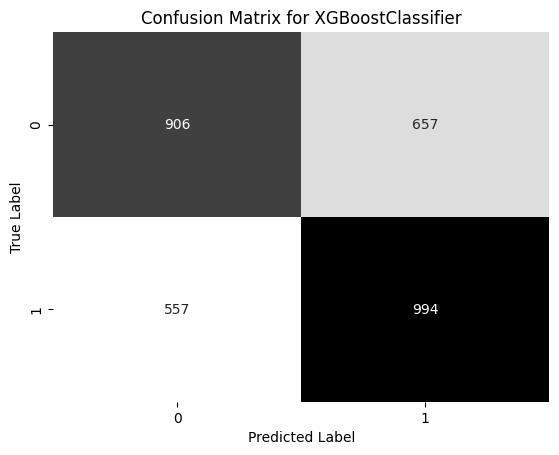

In [128]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [130]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test_old, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)



Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1563
           1       0.60      0.64      0.62      1551

    accuracy                           0.61      3114
   macro avg       0.61      0.61      0.61      3114
weighted avg       0.61      0.61      0.61      3114



#### Manually resampled with XGBoost Classifier

In [703]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


##### Select Columns

In [704]:
selected_columns =['produto_solicitado', 'dia_vencimento', 'forma_envio_solicitacao',
       'tipo_endereco', 'sexo', 'idade', 'estado_civil', 'qtde_dependentes',
       'nacionalidade', 'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_email',
       'renda_mensal_regular', 'renda_extra', 'possui_cartao_visa',
       'possui_cartao_mastercard', 'possui_outros_cartoes', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'profissao', 'ocupacao', 'local_onde_reside']
X_train = X_train_old[selected_columns]
X_test_old = X_test_old[selected_columns]
y_train = y_train_old
y_test_old = y_test_old

In [705]:
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_old)
print("Normalized input data(X):\n", X_train_scaled)

Normalized input data(X):
 [[ 5.63391906  0.28469581  0.98177083 ...  0.31206307 -0.33664903
   0.72253853]
 [-0.28004067  0.28469581 -0.72260335 ...  0.31206307  1.63211544
  -1.03528125]
 [-0.28004067 -0.45543451 -0.72260335 ...  0.31206307 -0.33664903
   1.53898781]
 ...
 [-0.28004067 -0.45543451 -0.72260335 ...  0.31206307 -0.99290385
  -0.08944929]
 [-0.28004067  0.28469581  0.98177083 ...  0.31206307  1.63211544
  -0.59805704]
 [-0.28004067  0.28469581 -0.72260335 ... -1.84525602  0.97586062
   0.44592729]]


In [706]:
X_blc, y_blc = X_train_scaled, y_train


In [707]:
## Busca por parametros

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300, 800,850],    
#     'learning_rate': [0.01, 0.001, 0.1, 0.2],   
#     'max_depth': [3, 4, 5,6],              
# }


# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

# grid_search.fit(X_blc, y_blc) # Demorou 2 min e 22s



##### Create and Fit Model

In [708]:
bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


In [709]:
bestXgbModel.fit(X_blc, y_blc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [710]:
y_pred = bestXgbModel.predict(X_test_scaled)


##### Metrics

In [711]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_old, y_pred)


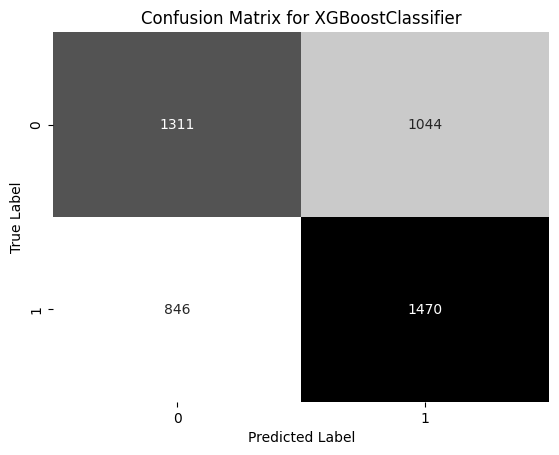

In [712]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [713]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test_old, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)



Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      2355
           1       0.58      0.63      0.61      2316

    accuracy                           0.60      4671
   macro avg       0.60      0.60      0.59      4671
weighted avg       0.60      0.60      0.59      4671



##### Teste

In [714]:
usingTestData.shape

(5000, 40)

In [715]:
# test data
X_test2 = usingTestData[selected_columns]

# Scale the test data
X_test_scaled = scaler.transform(X_test2)

# Predict using the trained model
y_test_pred = bestXgbModel.predict(X_test_scaled)

# Add predictions to the test dataframe with the original 'id_solicitante' column
df_test['inadimplente_pred'] = y_test_pred
df_test['id_solicitante'] = testIDs

# Create a new dataframe with 'id_solicitante' and 'inadimplente_pred'
df_predictions = df_test[['id_solicitante', 'inadimplente_pred']]

# Rename the columns to match the required header
df_predictions.columns = ['id_solicitante', 'inadimplente']

# Save the predictions to a CSV file
df_predictions.to_csv('predictionsv2.csv', index=False)


In [716]:
##### Select Columns
selected_columns =['produto_solicitado', 'dia_vencimento', 'forma_envio_solicitacao',
       'tipo_endereco', 'sexo', 'idade', 'estado_civil', 'qtde_dependentes',
       'nacionalidade', 'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_email',
       'renda_mensal_regular', 'renda_extra', 'possui_cartao_visa',
       'possui_cartao_mastercard', 'possui_outros_cartoes', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'profissao', 'ocupacao', 'local_onde_reside']
X_train = X_train[selected_columns]
X_test_old = X_test_old[selected_columns]
# y_train = y_train
# y_test_old = y_test_old


In [717]:
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_old)
X_blc, y_blc = X_train_scaled, y_train

print("Normalized input data(X):\n", X_train_scaled)


Normalized input data(X):
 [[ 5.63391906  0.28469581  0.98177083 ...  0.31206307 -0.33664903
   0.72253853]
 [-0.28004067  0.28469581 -0.72260335 ...  0.31206307  1.63211544
  -1.03528125]
 [-0.28004067 -0.45543451 -0.72260335 ...  0.31206307 -0.33664903
   1.53898781]
 ...
 [-0.28004067 -0.45543451 -0.72260335 ...  0.31206307 -0.99290385
  -0.08944929]
 [-0.28004067  0.28469581  0.98177083 ...  0.31206307  1.63211544
  -0.59805704]
 [-0.28004067  0.28469581 -0.72260335 ... -1.84525602  0.97586062
   0.44592729]]


In [718]:
X_blc.shape, y_blc.shape

((10897, 29), (10897,))

In [719]:
y_test_old.shape

(4671,)

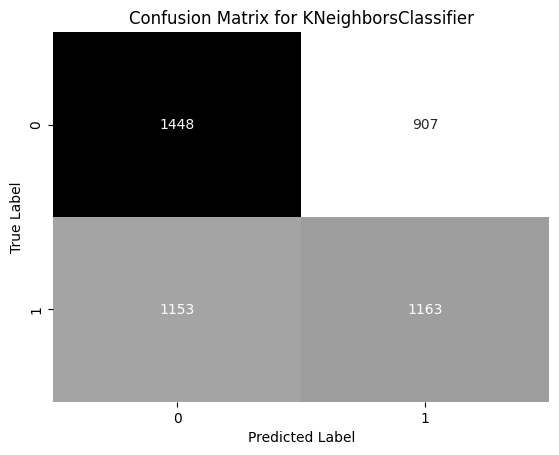


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      2355
           1       0.56      0.50      0.53      2316

    accuracy                           0.56      4671
   macro avg       0.56      0.56      0.56      4671
weighted avg       0.56      0.56      0.56      4671



In [720]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir o modelo KNN
knn = KNeighborsClassifier(n_neighbors=200)

# Treinar o modelo
knn.fit(X_blc, y_blc)

# Fazer previsões
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar o modelo
conf_matrix_knn = confusion_matrix(y_test_old, y_pred_knn)
classification_rep_knn = classification_report(y_test_old, y_pred_knn)

# Exibir a matriz de confusão
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Exibir o relatório de classificação
print('\nClassification Report for KNeighborsClassifier:')
print(classification_rep_knn)

In [721]:
usingTestData.shape

(5000, 40)

In [722]:
# test data
X_test2 = usingTestData[selected_columns]

# Scale the test data
X_test_scaled = scaler.transform(X_test2)

# Predict using the trained model
y_test_pred = knn.predict(X_test_scaled)

# Add predictions to the test dataframe with the original 'id_solicitante' column
df_test['inadimplente_pred'] = y_test_pred
df_test['id_solicitante'] = testIDs

# Create a new dataframe with 'id_solicitante' and 'inadimplente_pred'
df_predictions = df_test[['id_solicitante', 'inadimplente_pred']]

# Rename the columns to match the required header
df_predictions.columns = ['id_solicitante', 'inadimplente']

# Save the predictions to a CSV file
df_predictions.to_csv('predictionsv3.csv', index=False)


### RFE

In [88]:
# from sklearn.feature_selection import RFE
# for n_features_to_select1 in range(1,35):
#     # Inicializar o modelo RFE com o bestXgbModel
#     rfe = RFE(estimator=bestXgbModel, n_features_to_select=n_features_to_select1)  # Ajuste o número de atributos desejado

#     # Ajustar o RFE ao conjunto de dados de treino
#     rfe.fit(X_train_scaled, y_train)

#     # Obter os atributos selecionados
#     selected_features = X_train.columns[rfe.support_]
#     print("Selected Features:", selected_features)

#     # Transformar os conjuntos de dados de treino e teste para incluir apenas os atributos selecionados
#     X_train_rfe = rfe.transform(X_train_scaled)
#     X_test_rfe = rfe.transform(X_test_scaled)

#     # Treinar o modelo com os atributos selecionados
#     bestXgbModel.fit(X_train_rfe, y_train)

#     # Fazer previsões no conjunto de teste
#     y_pred_rfe = bestXgbModel.predict(X_test_rfe)

#     # Avaliar o modelo
#     conf_matrix_rfe = confusion_matrix(y_test_old, y_pred_rfe)
#     classification_rep_rfe = classification_report(y_test_old, y_pred_rfe)

#     print('\nConfusion Matrix for XGBoostClassifier with RFE:')
#     print(conf_matrix_rfe)
#     print('\nClassification Report for XGBoostClassifier with RFE:')
#     print(classification_rep_rfe)